## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_df = pd.DataFrame(mouse_metadata, columns=["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)"])
study_results_df = pd.DataFrame(study_results, columns=["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"])
merged_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
totalmicecount = merged_df["Mouse ID"].nunique()
totalmicecount

249

In [3]:
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Add a concatenated value to the list
merged_df["Concat"] = merged_df["Mouse ID"] + "-" + merged_df["Timepoint"].astype(str)
merged_df

# Count the total number of concatenated values
concatmouse = merged_df["Concat"].value_counts() > 1
concatmouse.head(10)

g989-0      True
g989-20     True
g989-10     True
g989-5      True
g989-15     True
g296-35    False
o795-5     False
u364-40    False
k483-35    False
d474-5     False
Name: Concat, dtype: bool

In [4]:
## Optional: Get all the data for the duplicate mouse ID.

# Amend query to look at the 'dirty' mouse
dirty_mouse = merged_df[merged_df['Mouse ID'] == 'g989']
dirty_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Concat
908,g989,Propriva,Female,21,26,0,45.000000,0,g989-0
909,g989,Propriva,Female,21,26,0,45.000000,0,g989-0
910,g989,Propriva,Female,21,26,5,48.786801,0,g989-5
911,g989,Propriva,Female,21,26,5,47.570392,0,g989-5
912,g989,Propriva,Female,21,26,10,51.745156,0,g989-10
913,g989,Propriva,Female,21,26,10,49.880528,0,g989-10
914,g989,Propriva,Female,21,26,15,51.325852,1,g989-15
915,g989,Propriva,Female,21,26,15,53.442020,0,g989-15
916,g989,Propriva,Female,21,26,20,55.326122,1,g989-20
917,g989,Propriva,Female,21,26,20,54.657650,1,g989-20


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Remove the duplicated mouse from the data (Mouse ID = g989)
clean_mouse_data = merged_df[merged_df['Mouse ID'] != 'g989']
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Concat
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403-0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403-5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403-10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403-15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403-20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969-25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969-30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969-35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969-40


In [6]:
# Checking the number of mice in the clean DataFrame.
revisedmicecount = clean_mouse_data["Mouse ID"].nunique()
revisedmicecount

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Calculate all variables
mean_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdev_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Create the grouping for drug reigmen
drug_regimen = clean_mouse_data["Drug Regimen"].value_counts()

# Create the dataframe for summary statistics 
tumorvol_summarystats = pd.DataFrame(
    {"Mean": mean_tumorvol,
     "Median": median_tumorvol,
     "Variance": var_tumorvol,
     "St. Dev.": stdev_tumorvol,
     "SEM": sem_tumorvol
    }
)   

# Add formatting
# tumorvol_summarystats["Mean"] = tumorvol_summarystats["Mean"].astype(float).map("{:,.2f}".format)
# tumorvol_summarystats["Median"] = tumorvol_summarystats["Median"].astype(float).map("{:,.2f}".format)
# tumorvol_summarystats["Variance"] = tumorvol_summarystats["Variance"].astype(float).map("{:,.2f}".format)
# tumorvol_summarystats["St. Dev."] = tumorvol_summarystats["St. Dev."].astype(float).map("{:,.2f}".format)
# tumorvol_summarystats["SEM"] = tumorvol_summarystats["SEM"].astype(float).map("{:,.2f}".format)

# Display table
tumorvol_summarystats.round(2)

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,St. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# Use Agg Function to summarise the calculations
mouse_summary_stats2 = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

mouse_summary_stats2.round(2)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

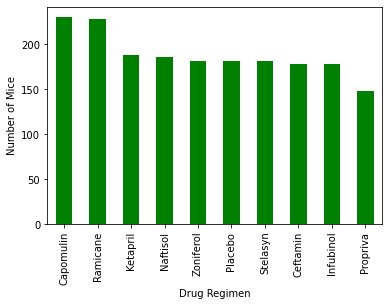

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Import the data, create new column for count, then group by "Drug Regimen" 
counts = clean_mouse_data["Drug Regimen"].value_counts()

# Plot the chart
counts.plot(kind="bar", color='Green', sort_columns=True)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.show()

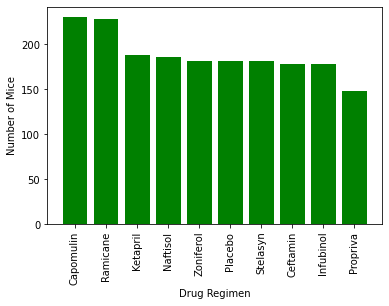

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
counts = clean_mouse_data["Drug Regimen"].value_counts()

# Plot the chart
plt.bar(counts.index, counts.values, color='Green', alpha=1, align="center")

# Give our chart some labels
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Mice");

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
